# Part One: Network Models

## Watts-Strogatz Networks

* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1.

In [300]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random as rnd
import collections

In [301]:
#set up vars
N = 500
k = 4 #average degree
p = [0, 0.1, 1]

#generating graphs
generated_graphs = []
for prob in p:
    generated_graphs.append(nx.watts_strogatz_graph(N,k,prob))

#calculate <d> for each graph
for i,item in enumerate(generated_graphs):
    print "p = "+ str(p[i]) + ", " + str(nx.average_shortest_path_length(item))

p = 0, 62.875751503
p = 0.1, 7.86716633267
p = 1, 4.79231262525


Describe what happens to the network when p = 1.
* When p = 1 the graph becomes very dense.

Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [302]:
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

#generating graphs
generated_graphs = {}
for prob in p:
    generated_subgraphs = [] #to store 50 generated graphs with p = prob
    for j in range(0,50):
        generated_subgraphs.append(nx.watts_strogatz_graph(N,k,prob))
    generated_graphs[prob] = generated_subgraphs
    
#calculate <d> for each graph
calculated_d = {}
for prob in p:
    graphs = generated_graphs[prob] #get graphs of particular prob (p)
    calculated_d_ofgraphs = [] #to store calculated <d>
    for i, item in enumerate(graphs):
        calculated_d_ofgraphs.append(nx.average_shortest_path_length(item))
    calculated_d[prob] = calculated_d_ofgraphs

In [303]:
#calculating standard deviation and mean
res_x = []
res_y = []
res_dev = []
for prob in p:
    res_y.append(np.mean(calculated_d[prob]))
    res_x.append(prob)
    res_dev.append(np.std(calculated_d[prob]))

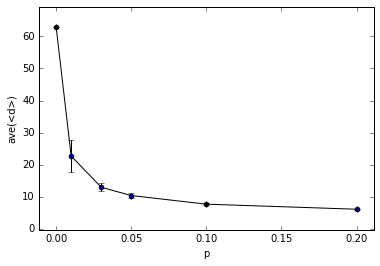

In [304]:
x = res_x #probability
y = res_y #mean
yerr = res_dev #deviation

plt.figure()
lines = plt.errorbar(x, y, xerr=0, yerr = yerr)
plt.ylabel('ave(<d>)')
plt.xlabel('p')
plt.margins(0.05, 0.1) #inner margin 
plt.setp(lines, 'color', 'black', 'linewidth', 1.0)
plt.scatter(x,y,s=20) #size of dots
plt.show()

# The Barabasi-Albert Model
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

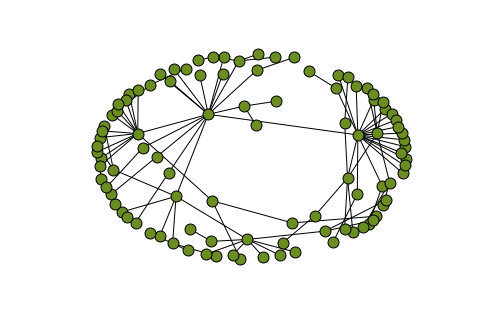

In [305]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range(2,100):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])
    
nx.draw_spring(G, node_size = 120, with_labels = False, node_color = '#6b8e23', k=0.15)
plt.show()

* Now create a 5000 node network.



In [306]:
G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range (2, 5000):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])

* What's the maximum and minimum degree?


In [307]:
degree_sequence = [d for n,d in G.degree().iteritems()]
print "Max degree is " + str(max(degree_sequence))
print "Min degree is " + str(min(degree_sequence))

Max degree is 216
Min degree is 1


* Now, bin the degree distribution, for example using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

In [308]:
val, bins = np.histogram(degree_sequence, bins=100)
bins = np.delete(bins, -1)

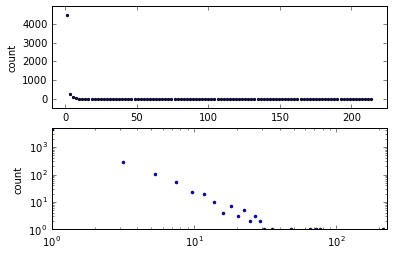

In [309]:
# Two subplots, the axes array is 1-d
plt.subplot(211)
plt.margins(0.05, 0.1) #inner margin 
plt.scatter(bins, val, s=5)
plt.ylabel('count')

plt.subplot(212)
plt.margins(0.05, 0.1) #inner margin 
plt.ylabel('count')
plt.loglog(bins, val,'bo', markersize = 3)


plt.show()

## Power-laws and the friendship paradox

* Pick a node i at random (e.g. use random.choice). Find its degree.

In [310]:
rand_node = rnd.choice(G.nodes())
degree_rand_node = G.degree(rand_node)
print "Degree of random node is " + str(degree_rand_node)

Degree of random node is 1


* Find i's neighbors. And calculate their average degree.


In [311]:
neighbours = G.neighbors(rand_node)

neighbours_degree = []
for item in neighbours:
    neighbours_degree.append(G.degree(item))
    
neighbours_average_degree = np.mean(neighbours_degree)

print "Average degree of neighbors is " + str(neighbours_average_degree)

Average degree of neighbors is 8.0


* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [312]:
if(degree_rand_node > neighbours_average_degree):
    print "I has more friends then its neighbours"
else:
    print "I has less friends then its neighbours"

I has less friends then its neighbours


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [313]:
true_counter = 0;
nodes = G.nodes()
for i in range(0,1000):
    #random nodes degree
    rand_node = rnd.choice(nodes)
    degree_rand_node = G.degree(rand_node)
    
    #get neighbors and calculate their average degree 
    neighbours = G.neighbors(rand_node)
    
    neighbours_degree = []
    for item in neighbours:
        neighbours_degree.append(G.degree(item))

    neighbours_average_degree = np.mean(neighbours_degree)
    
    if(degree_rand_node < neighbours_average_degree):
        true_counter += 1

print "%d is friendship paradox true" % true_counter
print "In "+ str((true_counter/float(1000))*100) + "% the friendship paradox is true"

871 is friendship paradox true
In 87.1% the friendship paradox is true


## Growth without preferential attachment

* Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

In [314]:
#generate network without the preferential attachment.
G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range (2, 5000):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i]) #we are not adding the random node to the list anymore

In [315]:
#calculate k - average degree first from graph G
G.degree()
G_degrees = [degree for i, degree in G.degree().iteritems()] #get degrees of each node
k = np.mean(G_degrees)

In [316]:
N = 5000
p = k/float((N - 1))# k = p*(n-1)
EG = nx.erdos_renyi_graph(n,p)

Now lets compare G and EG

In [317]:
print "G has " + str(nx.number_connected_components(G)) + " component"
print "EG has " + str(nx.number_connected_components(EG)) + " components"

G has 1 component
EG has 781 components


G has 1 component which means that there is always a path from one node to another wheras EG is rather clustered into smaller subgraphs

In [318]:
#lets calculate average degree for EG
EG.degree()
EG_degrees = [degree for i, degree in EG.degree().iteritems()] #get degrees of each node
EG_k = np.mean(EG_degrees)

#check degree 
print EG_k
print k

2.00520104021
1.9996


In [319]:
#getting degree sequence
EG_degree_sequence = [d for n,d in EG.degree().iteritems()]
G_degree_sequence = [d for n,d in G.degree().iteritems()]

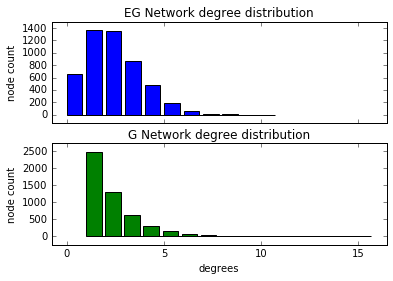

In [320]:
plt.clf()

#computing histogram
EG_val, EG_bins = np.histogram(EG_degree_sequence,bins=100)
EG_bins = np.delete(EG_bins, -1)

G_val, G_bins = np.histogram(G_degree_sequence, bins=100)
G_bins = np.delete(G_bins, -1)

# Two subplots, the axes array is 1-d
x1 = plt.subplot(211)
plt.margins(0.05, 0.1) #inner margin 
plt.bar(EG_bins, EG_val,width=0.80, color='b')
plt.ylabel('node count')
plt.title('EG Network degree distribution')
plt.setp(x1.get_xticklabels(), visible=False)

x2 = plt.subplot(212,sharex=x1)
plt.margins(0.05, 0.1) #inner margin 
plt.ylabel('node count')
plt.xlabel('degrees')
plt.bar(G_bins, G_val,width=0.80, color='g')
plt.title('G Network degree distribution')

plt.show()

Lets examine obtained degree distributions.

In Erdős–Rényi (EG, blue bars) graph the distribution is uniform and follows the set k. So most of its nodes have degree arround this k. Even though  the network generated without the preferential attachment (G, green bars) has the same k as well the distribution is significantly different. Most of the nodes have degree 1 and the number of them is decreasing with higher degree. We can interpret that as a graph with a lot of single nodes connected to one big cluster/hub. We can also see that there is not a single node with a degree 0 which means that if we pick every single node there is always a path to all nodes in the network from that node.
